Linear Regression Equation - Normal Equation<br>
$ \hat{\theta} = (X^{T}X)^{-1} X^{T} y $ <br>
$ \hat{\theta} - \text{Minimises the cost function} $ <br>
$ y - \text{vector of the target values containing } y^{(1)} \text{ to } y^{(m)} $ 

In [3]:
import numpy as np

In [93]:
x = 2 * np.random.rand(100,1)
y = 4 + 3 *  x + np.random.randn(100,1)

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')

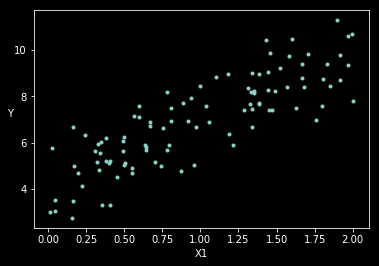

In [95]:
plt.scatter(x,y,marker='.')
plt.xlabel("X1")
plt.ylabel("Y",rotation=0)
plt.show()

In [96]:
x_b = np.c_[np.ones((100,1)),x] # adding x0 = 1 to each instance

In [97]:
theta = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y

In [98]:
theta 
# noise makes it impossible to get the exact values. 

array([[4.17552668],
       [2.83583465]])

The theta value is very close to our normal equation. 

In [99]:
x_new = np.array([[0],[2]])
x_new_b = np.c_[np.ones((2,1)),x_new]
y_predict = x_new_b @ theta

In [100]:
y_predict

array([[4.17552668],
       [9.84719598]])

In [101]:
x_new

array([[0],
       [2]])

In [102]:
x_new_b

array([[1., 0.],
       [1., 2.]])

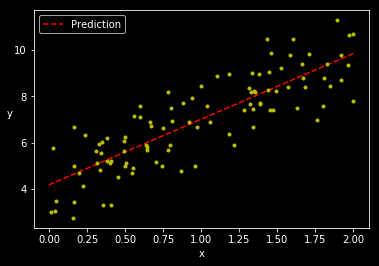

In [103]:
plt.plot(x_new,y_predict,"r--",label='Prediction')
plt.plot(x,y,"y.")
plt.xlabel("x")
plt.ylabel("y",rotation=0)
plt.legend() ; plt.show()

Performing the same Linear regression with sklearn

In [104]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.17552668]), array([[2.83583465]]))

In [105]:
lin_reg.predict(x_new)

array([[4.17552668],
       [9.84719598]])

Based on scipy.linalg.lstsq 

In [106]:
theta_best_svd, residuals,rank,s = np.linalg.lstsq(x_b,y,rcond=-1)

In [107]:
theta_best_svd

array([[4.17552668],
       [2.83583465]])

$ \hat{\theta} = X^{+}y $ <br>
$ X^{+} \text{ is the pseudoinverse / moore penrose inverse} $

In [108]:
np.linalg.pinv(x_b).dot(y)

array([[4.17552668],
       [2.83583465]])

Pseduoinverse is computed via matrix factorization technique called SVD
This is more efficient than the normal equation as if the matrix $ X^{T} $ is not invertiable or singular. if m < n or if some features are redundant. 
pseudo inverse is always defined. 

##### Compuational Complexity 

Both Normal equation ($ O(n^{2.4})$ to $ O(n^{3})$)  and the SVD approach ($ O(n^{2})$)is high and the approach will be slow when the number of features grows large.<br>
+ve - both are linear with regards to the number of instances so they are O(m) <br>

Once the linear regression model is trained on the above method, the prediction is very fast. <br>
making prediction on twice many instances will just take roughly twice as much time 

##### Gradient Descent
A very general optimization algorithm capable of finding the optimal solution. 
**The idea is to tweak parameters iteratively in order to minimize a cost function**

In [109]:
def lipschitz(x): return np.sqrt(x**2 + 5)

In [110]:
lipschitz(100)

100.024996875781

The training model searches for a combination of model parameters that minimizes a cost function (over a training set). It is a search in the model's parameter space. The more the parameters a model has the more dimensions this space has. 

When using gradient descent ensure all the features are at similar scale. StandardScaler class helps in scaling the feature variables. else the algorithm will converge very slowly. 

##### Batch Gradient Descent

$$ \frac{\partial}{\partial{\theta_j}} MSE(\theta) = \frac{2}{m} \sum_{i=1}^m(\theta^Tx^{(i)} - y^{(i)})x_j^{(i)}$$

Calculating how much the cost function will change if you change $\theta_j$ a little bit. Taking the partial derivative 

we calculate the $\Delta_\theta MSE(\theta) = \frac{2}{m}X^T(X\theta - y)$ 

Calculating the gradient step $ \theta^{\text{next step}} = \theta - \eta\Delta_\theta MSE(\theta) $

In [111]:
eta = [0.02,0.1,0.5] # 
n_iterations = 100
theta = np.random.randn(2,1) 
m = 100

value = []
for j in eta:
    for i in range(n_iterations):
        gradients = 2/m * x_b.T @ (x_b @ theta - y)
        theta = theta - eta * gradients
        value.append(gradients.round())
        plt.plot(x,y,'.')
        plt.plot(x_)

In [112]:
theta

array([[4.1172733 ],
       [2.88612194]])